In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
X = pd.read_csv("../data/processed/X.csv")
y = pd.read_csv("../data/processed/y.csv")


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [5]:
dt_pred = dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

dt_mae, dt_rmse, dt_r2


(0.7375409836065573, 1.1337266273550122, 0.9442021510484521)

In [6]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [7]:
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

rf_mae, rf_rmse, rf_r2


(0.5971295081967213, 0.906082658716206, 0.9643601062650229)

In [8]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [1.2163740193336925, dt_mae, rf_mae],
    "RMSE": [1.8658375680950832, dt_rmse, rf_rmse],
    "R2": [0.8488707839191784, dt_r2, rf_r2]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,1.216374,1.865838,0.848871
1,Decision Tree,0.737541,1.133727,0.944202
2,Random Forest,0.597130,0.906083,0.964360


In [9]:
import joblib

joblib.dump(rf, "../models/random_forest_model.pkl")


['../models/random_forest_model.pkl']

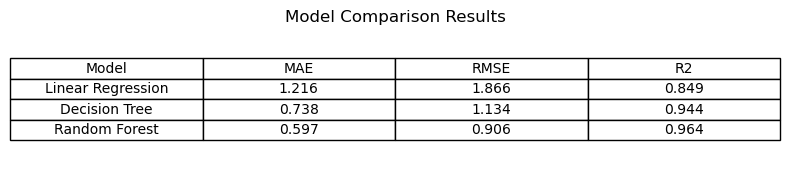

In [10]:
import matplotlib.pyplot as plt

# results is the DataFrame you already created
# (Model / MAE / RMSE / R2)

# Round for neat display
results_rounded = results.copy()
results_rounded["MAE"] = results_rounded["MAE"].round(3)
results_rounded["RMSE"] = results_rounded["RMSE"].round(3)
results_rounded["R2"] = results_rounded["R2"].round(3)

fig, ax = plt.subplots(figsize=(8, 1.8))
ax.axis("off")

table = ax.table(
    cellText=results_rounded.values,
    colLabels=results_rounded.columns,
    cellLoc="center",
    loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.title("Model Comparison Results", pad=12)
plt.tight_layout()

# Save to reports/figures
plt.savefig("../reports/figures/model_comparison.png", dpi=200, bbox_inches="tight")
plt.show()
